***Importing the dependencies***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

***Data Collection and Processing***

In [2]:
# Loading the data in the csv file into a pandas Data Frame.
df = pd.read_csv('gld_price_data.csv')

In [10]:
# Getting the first Five rows in the data frame.
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
# Getting the last Five rows in the data frame.
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
# Checking the nnumber of rows and columns.
df.shape

(2290, 6)

In [7]:
# Getting the data types of the features in the data set.
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [8]:
# Checking for the missing values in the data frame.
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# Checking for the duplicates.
df.duplicated().sum()

0

In [14]:
# Getting the statistical measures for the data frame.
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


***Understading the correlations between the features in the dataset.***

In [16]:
# Getting the correlation matrix
cors = df.corr()
print(cors.to_string())

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


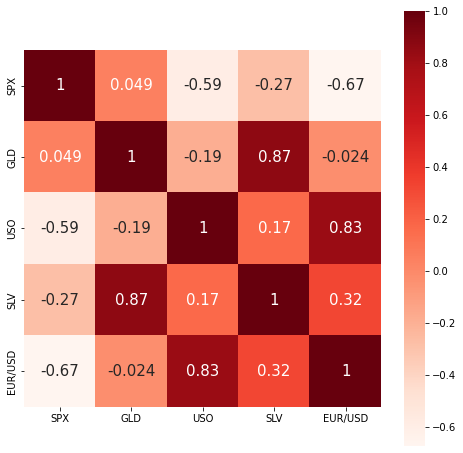

In [22]:
# Connstructing a heat map to understand the correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(cors,cbar=True,square=True,annot=True,annot_kws={'size':15},cmap='Reds')

In [23]:
# Correlation values for GLD.
print(cors["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


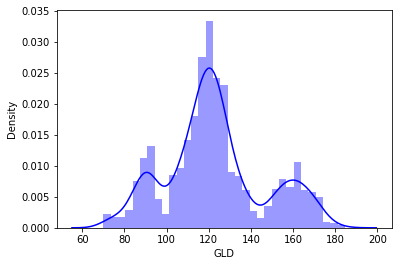

In [25]:
# Checking the distribution of the Gold Price.
sns.distplot(df["GLD"],color='blue')

***Splitting the data and the target***

In [27]:
# Splitting the date and gold columns from the data set.
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']
print("DATA VALUES\n",X)
print("\n\nTARGETS\n",Y)

DATA VALUES
               SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


TARGETS
 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


***Splitting the data into training data and testing data.***

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


***Model Training***

RANDOM FOREST REGRESSOR

In [30]:
# Loading the model.
model = RandomForestRegressor(n_estimators=100)

In [31]:
# Training the model.
model.fit(X_train,Y_train)

RandomForestRegressor()

***Model Evaluation***

In [33]:
# Accuracy for prediction on training data
training_data_prediction = model.predict(X_train) 
print(training_data_prediction)

[110.00899801 114.68520076  90.53609992 ... 130.79089656 159.96099564
 114.73889971]


In [34]:
# Error Testing for Training Data 

#  R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R Squared Error:   ", score_1)
print("Mean Absolute Error:   ", score_2)

R Squared Error:    0.9985113126545451
Mean Absolute Error:    0.4849848824454139


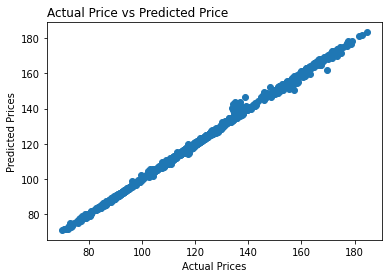

In [35]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price",loc = 'left')
plt.show()

In [36]:
# Accuracy for prediction o testing data
testing_data_prediction = model.predict(X_test) 
print(testing_data_prediction)

[168.50429936  81.93319994 115.60550027 127.79790063 120.76540124
 154.88629757 150.30319778 126.0755004  117.66679901 125.98740085
 116.87640079 171.56500106 141.44139852 168.1018981  115.1264001
 117.65220036 139.96940261 169.95460014 159.95480433 158.52469988
 155.07459981 125.2251001  175.88860011 156.97350375 125.18490027
  93.6597996   76.74090046 121.18449993 119.2617998  167.51490016
  88.22090033 125.13819993  91.00520049 117.65290019 121.09929903
 136.4816004  115.39280137 115.60950054 147.41659941 107.29620095
 104.61650242  87.1749978  126.40390094 117.8117999  154.03679916
 119.66180016 108.36219994 107.98509806  93.21230065 127.05599795
  75.36780004 113.62369898 121.2550004  111.25129879 118.95939887
 120.54669955 158.94549996 166.50000182 146.98559689  85.93299891
  94.35820041  86.84069886  90.36210034 118.96750086 126.41810095
 127.37850008 167.69249982 122.23929913 117.45449883  98.4684004
 167.84060078 142.70599727 132.02410256 121.16720216 120.61999951
 119.5569006

In [37]:
# Error Testing for Testing Data 

#  R Squared Error
score_1 = metrics.r2_score(Y_test, testing_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, testing_data_prediction)

print("R Squared Error:   ", score_1)
print("Mean Absolute Error:   ", score_2)

R Squared Error:    0.9889865675317613
Mean Absolute Error:    1.3410535880131003


***Comparing the Actual Values and the Predicted Values***

In [51]:
Y_test = list(Y_test)

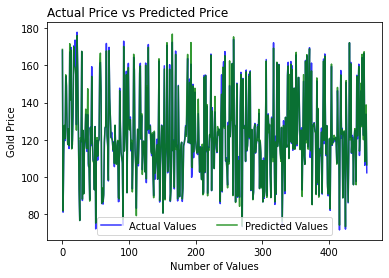

In [53]:
plt.plot(Y_test, color = 'blue', alpha= 0.8, label = "Actual Values")
plt.plot(testing_data_prediction, color = 'green', alpha = 0.8, label = "Predicted Values")
plt.title("Actual Price vs Predicted Price",loc = 'left')
plt.xlabel("Number of Values")
plt.ylabel("Gold Price")
plt.legend(ncol = 2)
plt.show()